**Group 7 (Section 009)**
=

*delete this cell before handing in*

maximum of **2000 words** (excluding citations) using Jupyter. 
The report should include the posed question, conducted analysis, and derived conclusion.
It is not required to include all tasks completed by every group member in their individual assignments; tailor the final report to the collective group's work. 
Make sure to reach a consensus among all team members on the final content of the report.

**Due date: Saturday December 6, 11:59 PM**

# **Title: Predicting Subscription Status in Minecraft - The Roles of Age and Playtime** 

## **Introduction:**

**Background information:** 
- Frank Wood, an associate professor of computer science at UBC, is leading a research group in learning about players' actions in a MineCraft server that they have created. 

**Questions:**
- One question they asked was: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**
- Our group is interested in answering the following question: **"Can the number of hours the players spend on the server (played_hours) and the age of the player (Age) predict if a player will subscribe (subscribe) to a game-related newletter based on the players.csv dataset?"**

**Dataset description:**
- We will be using the players.csv dataset.
- There are 196 observations in this dataset.
- The dataset contains the following variables: **experience** (one of Amateur, Regular, Pro, Veteran), **subscribe** (whether or not a player subsribes to the newsletter), **hashedEmail** (player email), **played_hours** (hours player spent on the MineCraft server), **name** (player name), **gender** (one of Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say), **Age** (player age).
- We will be focusing on the following variables for our analysis: **Age**, **played_hours**, **subscribe**.

## **Methods & Results:**

*delete the below before handing in*

describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all figures should have a figure number and a legend

Load Data 
-

In [1]:
# Loading the dataset
library(tidyverse)

url_players = "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/players.csv"

### Need to ask about this since TA said not good to use download.file and to use read_csv instead
download.file(url_players, "players.csv")
players <- read_csv("players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Wrangling and cleaning the data
-

In [2]:
players <- players %>% select(-experience, -hashedEmail, -name, -gender) |>
  mutate(
    subscribe = as.factor(subscribe),     
    played_hours = as.numeric(played_hours),  
    Age = as.numeric(Age)                 
  )

In [16]:
players <- players %>% 
  rename(
    "Hours Played" = played_hours,
    "Subscription Status" = subscribe
  )
head(players)

ERROR: [1m[33mError[39m in `rename()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `played_hours` doesn't exist.


The quantitative variables "Age" and "played_hours" will be used to predict a gamer's subscription status as one of the two categories: "TRUE" or "FALSE", using K-NN classification. Therefore, the dataframe above should be simplified to only include the two predictor variables and the reponse variable in question. 

In [4]:
# is.na(players, Age)

There are missing Age values, so we will remove them.

In [5]:
# clean_players <- players |>
#     filter(!is.na(Age)) |>
#     select(Age, played_hours, subcribe)

Summary of Dataset
-

In [6]:
summary(players)

 subscribe    played_hours          Age       
 FALSE: 52   Min.   :  0.000   Min.   : 9.00  
 TRUE :144   1st Qu.:  0.000   1st Qu.:17.00  
             Median :  0.100   Median :19.00  
             Mean   :  5.846   Mean   :21.14  
             3rd Qu.:  0.600   3rd Qu.:22.75  
             Max.   :223.100   Max.   :58.00  
                               NA's   :2      

In [ ]:
# mean, median, mode of Age and played_hours

mean(players, played_hours)

Exploratory Data Visualizations
-

In [ ]:
# Graph 1: Age vs Hours Played

options(repr.plot.width = 12, repr.plot.height = 6)
players_scatter_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) + 
    geom_point(na.rm = TRUE) + 
    labs(x = "Age of Player",
         y = "Amount of Time Played (hours)",
         color = "Subscribed or Not",
         title = "Age vs Amount of Time Played") +
    theme(text = element_text(size = 18))
players_scatter_plot

### **Graph 1: Subscription Status Visual**

Warning message:
“Unknown or uninitialised column: `Subscription Status`.”
Warning message in min(w.l):
“no non-missing arguments to min; returning Inf”
Warning message in max(w.r):
“no non-missing arguments to max; returning -Inf”
Warning message in max(counts):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(xlim, ylim, log = log, ...): need finite 'xlim' values


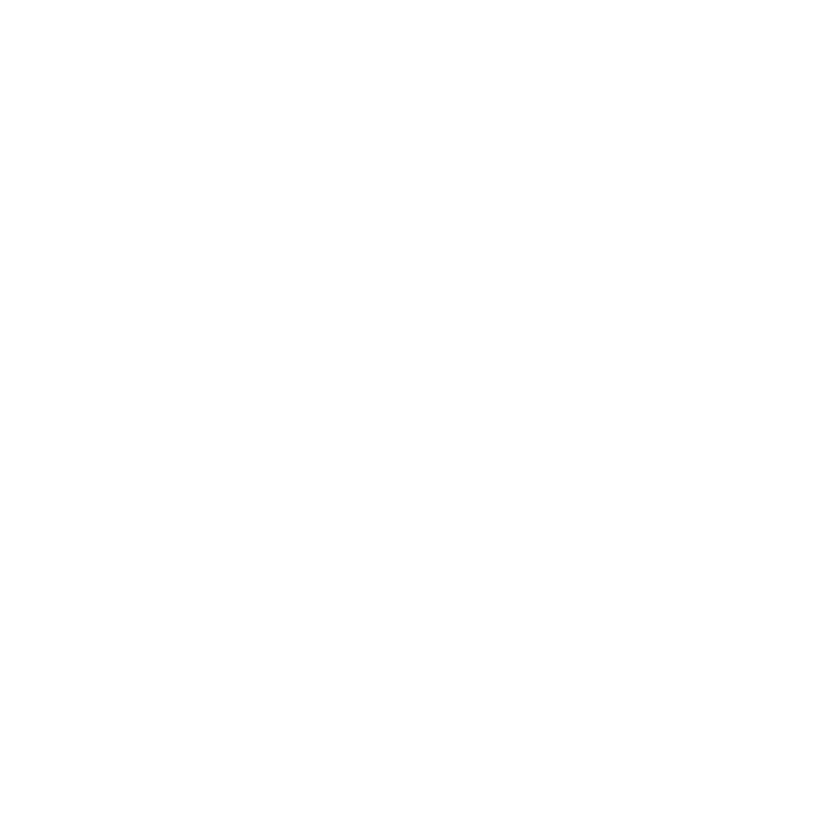

In [7]:
counts <- table(players$'Subscription Status')
bar_colors <- c("deeppink", "plum")

subscription_status_visual <- barplot(
  counts,
  main = "Subscription Status Visual",
  xlab = "Category",
  ylab = "Frequency",
  col = bar_colors,
  ylim = c(0, max(counts) + 1)
)
subscription_status_visual

### **Graph 2: Histogram of Hours Played**

In [ ]:
range(players$`Hours Played`, na.rm = TRUE)

In [ ]:
hours_played_visual <- hist(
  players$`Hours Played`,
  breaks = seq(0, 224, by = 1),   
  main = "Histogram of Hours Played",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "plum",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 50),                
  ylim = c(0, 175)                 
)


abline(h = seq(0, 300, 50), col = "gray80", lty = 2)


hours_played_visual

Most of the observations in the Histogram of Hours Played are in the first four bins that each have a one hour range between bins. The histogram below was created to zoom in on where the majority of the observations lie for a different perspective. 

### **Graph 3: Histogram of Hours Played (0 to 4)**

In [ ]:
zoom_in_data_filter <- players$`Hours Played`[
  players$`Hours Played` >= 0 &
  players$`Hours Played` <= 4
]


histogram_zoomed <- hist(
  zoom_in_data_filter,
  breaks = seq(0, 4, by = 0.1),
  main = "Histogram of Hours Played (0 to 4)",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "deeppink",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 4)
)
histogram_zoomed

### **Graph 4: Age by Subscription Status**

In [ ]:
box_plot_age_sub <- boxplot(
  players$Age ~ players$`Subscription Status`,
  main = "Age by Subscription Status",
  xlab = "Subscription Status",
  ylab = "Age",
  col = c("deeppink", "plum"),   
  border = "black",
  lwd = 2
)
box_plot_age_sub

### **Graph 5: Distribution of Player Age and Subscription Proportions**

In [14]:
# Graph 5: Distribution of Player Age and Subscription Proportions

options(repr.plot.width = 10, repr.plot.height = 6)

players_hist <- ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 2, color = "black") + 
    labs(x = "Player Age", 
         y = "Count of Players", 
         fill = "Subscribed or Not", 
         title = "Distribution of Player Age and Subscription Status") +
    scale_fill_manual(values = c("blue", "darkorange")) +
    theme(text = element_text(size = 16))

players_hist 

ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'subscribe' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_

### **Graph 6: Log transformations**

In [12]:
# log transformations
library(dplyr)

log_players <- players |>
    mutate(log_played_hours = log(played_hours))

log_players_plot <- log_players |>
    ggplot(aes(sample = log_played_hours)) +  
    stat_qq(shape = 1, size = 2) +
    stat_qq_line() +
    labs(x = "Normal quantile", 
         y = "Played Hours (log)")
log_players_plot

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `log_played_hours = log(played_hours)`.
[1mCaused by error:[22m
[33m![39m object 'played_hours' not found


# Data Analysis (K-NN classification)

In [ ]:
# standardize/scale data for KNN
players_recipe <- clean_players |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
players_recipe

**Discussion:**
-
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

**References**
-
- You may include references if necessary, as long as they all have a consistent citation style.
- Hint: use your proposal as a basis for your final report!
- https://ubco-biology.github.io/BIOL202/transform.html